In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/stat_spaziale/"

In [ ]:
import pandas as pd
hmda = pd.read_csv(filepath + "ny_hmda_2015.csv")
hmda.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,17,31,32,33,34,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


action_taken action_taken_name  agency_code agency_abbr  \
0             1   Loan originated            9        CFPB   
1             1   Loan originated            9        CFPB   
2             1   Loan originated            7         HUD   
3             1   Loan originated            9        CFPB   
4             1   Loan originated            9        CFPB   

                                   agency_name  applicant_ethnicity  \
0         Consumer Financial Protection Bureau                    2   
1         Consumer Financial Protection Bureau                    2   
2  Department of Housing and Urban Development                    2   
3         Consumer Financial Protection Bureau                    2   
4         Consumer Financial Protection Bureau                    2   

  applicant_ethnicity_name  applicant_income_000s  applicant_race_1  \
0   Not Hispanic or Latino                   97.0                 5   
1   Not Hispanic or Latino                  200.0                 5   
2   Not Hispanic or Latino                    NaN                 3   
3   Not Hispanic or Latino                  202.0                 5   
4   Not Hispanic or Latino                  255.0                 5   

   applicant_race_2  ...  state_abbr  state_name  hud_median_family_income  \
0               NaN  ...          NY    New York                  109000.0   
1               NaN  ...          NY    New York                   71300.0   
2               NaN  ...          NY    New York                   71300.0   
3               NaN  ...          NY    New York                  109000.0   
4               NaN  ...          NY    New York                  109000.0   

  loan_amount_000s number_of_1_to_4_family_units  \
0              187                         363.0   
1              460                          53.0   
2              296                        2745.0   
3              770                        1879.0   
4              648                         835.0   

  number_of_owner_occupied_units minority_population population  rate_spread  \
0                         1817.0           21.139999     5870.0          NaN   
1                          256.0           45.959999     3512.0          NaN   
2                         2586.0           38.990002     8357.0          NaN   
3                         2147.0            7.350000     6642.0          NaN   
4                          676.0           30.059999     2339.0          NaN   

  tract_to_msamd_income  
0            109.459999  
1            160.600006  
2            134.820007  
3            165.830002  
4            133.300003  

[5 rows x 78 columns]

In [ ]:
hmda.shape

(439654, 78)

ora facciamo una veloce analisi esplorativa 

In [ ]:
pd.set_option('display.max_rows', None)
percent_missing = hmda.isnull().sum() * 100 / len(hmda)
percent_missing

action_taken                       0.000000
action_taken_name                  0.000000
agency_code                        0.000000
agency_abbr                        0.000000
agency_name                        0.000000
applicant_ethnicity                0.000000
applicant_ethnicity_name           0.000000
applicant_income_000s             13.875229
applicant_race_1                   0.000000
applicant_race_2                  99.633803
applicant_race_3                  99.980212
applicant_race_4                  99.996588
applicant_race_5                  99.997953
applicant_race_name_1              0.000000
applicant_race_name_2             99.633803
applicant_race_name_3             99.980212
applicant_race_name_4             99.996588
applicant_race_name_5             99.997953
applicant_sex                      0.000000
applicant_sex_name                 0.000000
application_date_indicator         0.000000
as_of_year                         0.000000
census_tract_number             

In [ ]:
hmda.dtypes

action_taken                        int64
action_taken_name                  object
agency_code                         int64
agency_abbr                        object
agency_name                        object
applicant_ethnicity                 int64
applicant_ethnicity_name           object
applicant_income_000s             float64
applicant_race_1                    int64
applicant_race_2                  float64
applicant_race_3                  float64
applicant_race_4                  float64
applicant_race_5                  float64
applicant_race_name_1              object
applicant_race_name_2              object
applicant_race_name_3              object
applicant_race_name_4              object
applicant_race_name_5              object
applicant_sex                       int64
applicant_sex_name                 object
application_date_indicator          int64
as_of_year                          int64
census_tract_number               float64
co_applicant_ethnicity            

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

Output hidden; open in https://colab.research.google.com to view.

molte variabili sono codificate sia in modo ordinale che cardinale; prima togliamo le variabili codificate in modo ordinale e poi togliamo quelle che presentano l'80% o più di valori mancanti 

In [ ]:
hmda_name = hmda.drop(['applicant_race_2', "applicant_race_3", "applicant_race_4", "applicant_race_5", "applicant_race_name_2", "applicant_race_name_3", "applicant_race_name_4" , "applicant_race_name_5", "co_applicant_race_2", "co_applicant_race_3", "co_applicant_race_4", "co_applicant_race_5", "co_applicant_race_name_2", "co_applicant_race_name_3", "co_applicant_race_name_4", "co_applicant_race_name_5", "denial_reason_1", "denial_reason_2", "denial_reason_3", "denial_reason_name_1", "denial_reason_name_2", "denial_reason_name_3", "edit_status", "edit_status_name", "rate_spread", "action_taken", "agency_code", "agency_abbr", "applicant_ethnicity", "co_applicant_ethnicity", "co_applicant_race_1", "co_applicant_sex", "county_code", "lien_status", "loan_purpose", "msamd_name", "owner_occupancy", "preapproval", "property_type", "purchaser_type"], axis = 1)

abbiamo creato il dataset solo con le variabili nominali "hmda_name" 


In [ ]:
hmda_name.shape

(439654, 38)

In [ ]:
hmda_name.head()

action_taken_name                                  agency_name  \
0   Loan originated         Consumer Financial Protection Bureau   
1   Loan originated         Consumer Financial Protection Bureau   
2   Loan originated  Department of Housing and Urban Development   
3   Loan originated         Consumer Financial Protection Bureau   
4   Loan originated         Consumer Financial Protection Bureau   

  applicant_ethnicity_name  applicant_income_000s  applicant_race_1  \
0   Not Hispanic or Latino                   97.0                 5   
1   Not Hispanic or Latino                  200.0                 5   
2   Not Hispanic or Latino                    NaN                 3   
3   Not Hispanic or Latino                  202.0                 5   
4   Not Hispanic or Latino                  255.0                 5   

       applicant_race_name_1  applicant_sex applicant_sex_name  \
0                      White              2             Female   
1                      White              1               Male   
2  Black or African American              1               Male   
3                      White              1               Male   
4                      White              1               Male   

   application_date_indicator  as_of_year  ...  state_code state_abbr  \
0                           0        2015  ...          36         NY   
1                           0        2015  ...          36         NY   
2                           0        2015  ...          36         NY   
3                           0        2015  ...          36         NY   
4                           0        2015  ...          36         NY   

  state_name hud_median_family_income loan_amount_000s  \
0   New York                 109000.0              187   
1   New York                  71300.0              460   
2   New York                  71300.0              296   
3   New York                 109000.0              770   
4   New York                 109000.0              648   

   number_of_1_to_4_family_units number_of_owner_occupied_units  \
0                          363.0                         1817.0   
1                           53.0                          256.0   
2                         2745.0                         2586.0   
3                         1879.0                         2147.0   
4                          835.0                          676.0   

  minority_population population  tract_to_msamd_income  
0           21.139999     5870.0             109.459999  
1           45.959999     3512.0             160.600006  
2           38.990002     8357.0             134.820007  
3            7.350000     6642.0             165.830002  
4           30.059999     2339.0             133.300003  

[5 rows x 38 columns]

hdma_name è il dataset con i nomi, ora creaimo hmda che è quello su cui lavoreremo con le codifiche numeriche. Per avere i riferimenti nominali fare riferimento al doc su google drive

In [ ]:
hmda.columns

Index(['action_taken', 'action_taken_name', 'agency_code', 'agency_abbr',
       'agency_name', 'applicant_ethnicity', 'applicant_ethnicity_name',
       'applicant_income_000s', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'applicant_race_name_1', 'applicant_race_name_2',
       'applicant_race_name_3', 'applicant_race_name_4',
       'applicant_race_name_5', 'applicant_sex', 'applicant_sex_name',
       'application_date_indicator', 'as_of_year', 'census_tract_number',
       'co_applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3',
       'co_applicant_race_4', 'co_applicant_race_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'co_applicant_sex', 'co_applicant_sex_name',
       'county_code', 'county_name', 'denial_reason_1', 

In [ ]:
hmda= hmda.drop(["action_taken_name", "agency_abbr", "agency_name" ,"applicant_ethnicity_name", "applicant_race_name_1","applicant_race_name_2", "applicant_race_name_3", "applicant_race_name_4", "applicant_race_name_5", "applicant_sex_name", "co_applicant_ethnicity_name", "co_applicant_race_name_1", "co_applicant_race_name_2", "co_applicant_race_name_3", "co_applicant_race_name_4", "co_applicant_race_name_5", "co_applicant_sex_name", "county_name", "denial_reason_name_1", "denial_reason_name_2", "denial_reason_name_3", "edit_status_name", "hoepa_status_name", "lien_status_name", "loan_purpose_name", "loan_type_name", "msamd_name", "owner_occupancy_name", "preapproval_name", "purchaser_type_name", "state_abbr", "state_name", "property_type_name"], axis = 1)
hmda.head()

action_taken  agency_code  applicant_ethnicity  applicant_income_000s  \
0             1            9                    2                   97.0   
1             1            9                    2                  200.0   
2             1            7                    2                    NaN   
3             1            9                    2                  202.0   
4             1            9                    2                  255.0   

   applicant_race_1  applicant_race_2  applicant_race_3  applicant_race_4  \
0                 5               NaN               NaN               NaN   
1                 5               NaN               NaN               NaN   
2                 3               NaN               NaN               NaN   
3                 5               NaN               NaN               NaN   
4                 5               NaN               NaN               NaN   

   applicant_race_5  applicant_sex  ...  sequence_number  state_code  \
0               NaN              2  ...           164811          36   
1               NaN              1  ...            26589          36   
2               NaN              1  ...           141383          36   
3               NaN              1  ...           154957          36   
4               NaN              1  ...           106528          36   

   hud_median_family_income  loan_amount_000s  number_of_1_to_4_family_units  \
0                  109000.0               187                          363.0   
1                   71300.0               460                           53.0   
2                   71300.0               296                         2745.0   
3                  109000.0               770                         1879.0   
4                  109000.0               648                          835.0   

   number_of_owner_occupied_units  minority_population  population  \
0                          1817.0            21.139999      5870.0   
1                           256.0            45.959999      3512.0   
2                          2586.0            38.990002      8357.0   
3                          2147.0             7.350000      6642.0   
4                           676.0            30.059999      2339.0   

   rate_spread  tract_to_msamd_income  
0          NaN             109.459999  
1          NaN             160.600006  
2          NaN             134.820007  
3          NaN             165.830002  
4          NaN             133.300003  

[5 rows x 45 columns]

In [ ]:
pd.set_option('display.max_rows', None)
percent_missing = hmda.isnull().sum() * 100 / len(hmda)
percent_missing

action_taken                       0.000000
agency_code                        0.000000
applicant_ethnicity                0.000000
applicant_income_000s             13.875229
applicant_race_1                   0.000000
applicant_race_2                  99.633803
applicant_race_3                  99.980212
applicant_race_4                  99.996588
applicant_race_5                  99.997953
applicant_sex                      0.000000
application_date_indicator         0.000000
as_of_year                         0.000000
census_tract_number                0.379162
co_applicant_ethnicity             0.000000
co_applicant_race_1                0.000000
co_applicant_race_2               99.889004
co_applicant_race_3               99.992722
co_applicant_race_4               99.999090
co_applicant_race_5               99.999545
co_applicant_sex                   0.000000
county_code                        0.271122
denial_reason_1                   86.805533
denial_reason_2                 

togliamo le variabili con l'80% o più di valori nulli. 

In [ ]:
hmda.drop(["applicant_race_5", "applicant_race_2" , "applicant_race_3", "applicant_race_4", "co_applicant_race_2", "co_applicant_race_3", "applicant_race_4", "applicant_race_5", "denial_reason_1", "denial_reason_2", "denial_reason_3", "edit_status", "rate_spread"], axis = 1, inplace = True)

In [ ]:
hmda.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_income_000s', 'applicant_race_1', 'applicant_sex',
       'application_date_indicator', 'as_of_year', 'census_tract_number',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_race_5', 'co_applicant_sex', 'county_code',
       'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'msamd',
       'owner_occupancy', 'preapproval', 'property_type', 'purchaser_type',
       'respondent_id', 'sequence_number', 'state_code',
       'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'tract_to_msamd_income'],
      dtype='object')

In [ ]:
hmda.nunique()

action_taken                           7
agency_code                            6
applicant_ethnicity                    4
applicant_income_000s               2572
applicant_race_1                       7
applicant_sex                          4
application_date_indicator             3
as_of_year                             1
census_tract_number                 2658
co_applicant_ethnicity                 5
co_applicant_race_1                    8
co_applicant_race_4                    2
co_applicant_race_5                    1
co_applicant_sex                       5
county_code                           62
hoepa_status                           2
lien_status                            4
loan_purpose                           3
loan_type                              4
msamd                                 14
owner_occupancy                        3
preapproval                            3
property_type                          3
purchaser_type                        10
respondent_id   

droppiamo l'id perchè non è informativa come variabile e anche sequence number perchè è un tipo di id. inoltre dato che l'anno è sempre lo stesso(2015) droppiamo anche la variabile "as_of_year" e anche "state_code" presenta sempre gli stessi valori. guardiamo il valore di "co_applicant_race_5" perch+è sembra presentare sempre un valore costante. inoltre eliminiamo la variabile census tract number perchè è solo una variabile numerica che indica una posizione geografica nello sttao di NY ma come variabile geografica abbiamo giù county_code che è  il codice della contea.  

In [ ]:
hmda.drop(["respondent_id", "sequence_number", "as_of_year", "state_code", "census_tract_number"], axis = 1, inplace = True)

ora vediamo il valore di co_applicant_race_5

In [ ]:
hmda["co_applicant_race_5"]

Output hidden; open in https://colab.research.google.com to view.

sono tutti valori mancanti perciò togliamo la variabile 

In [ ]:
hmda.drop(["co_applicant_race_5"], axis = 1, inplace = True)

In [ ]:
hmda.head()

action_taken  agency_code  applicant_ethnicity  applicant_income_000s  \
0             1            9                    2                   97.0   
1             1            9                    2                  200.0   
2             1            7                    2                    NaN   
3             1            9                    2                  202.0   
4             1            9                    2                  255.0   

   applicant_race_1  applicant_sex  application_date_indicator  \
0                 5              2                           0   
1                 5              1                           0   
2                 3              1                           0   
3                 5              1                           0   
4                 5              1                           0   

   co_applicant_ethnicity  co_applicant_race_1  co_applicant_race_4  ...  \
0                       5                    8                  NaN  ...   
1                       5                    8                  NaN  ...   
2                       5                    8                  NaN  ...   
3                       2                    5                  NaN  ...   
4                       5                    8                  NaN  ...   

   preapproval  property_type  purchaser_type  hud_median_family_income  \
0            3              1               0                  109000.0   
1            3              1               6                   71300.0   
2            3              1               3                   71300.0   
3            3              1               0                  109000.0   
4            2              1               0                  109000.0   

   loan_amount_000s  number_of_1_to_4_family_units  \
0               187                          363.0   
1               460                           53.0   
2               296                         2745.0   
3               770                         1879.0   
4               648                          835.0   

   number_of_owner_occupied_units  minority_population  population  \
0                          1817.0            21.139999      5870.0   
1                           256.0            45.959999      3512.0   
2                          2586.0            38.990002      8357.0   
3                          2147.0             7.350000      6642.0   
4                           676.0            30.059999      2339.0   

   tract_to_msamd_income  
0             109.459999  
1             160.600006  
2             134.820007  
3             165.830002  
4             133.300003  

[5 rows x 28 columns]

**raggruppamento**
dato che molte variabili presentano molti valori diversi le raggruppiamo

In [ ]:
max = hmda['applicant_income_000s'].max()
min= hmda['applicant_income_000s'].min()
max, min

(9999.0, 1.0)

decidiamo di raggruppare la variabile applicant income in base a degli intervalli standard di riferimento 

In [ ]:
hmda.loc[hmda['applicant_income_000s']<=5.0, 'income'] = 1 #'1-5'
hmda.loc[hmda['applicant_income_000s'].between(5.1,10.0), 'income'] = 2 #'5-10'
hmda.loc[hmda['applicant_income_000s'].between(10.1,20.0), 'income'] = 3 #'10-20'
hmda.loc[hmda['applicant_income_000s'].between(20.1,30.0), 'income'] = 4 #'20-30'
hmda.loc[hmda['applicant_income_000s'].between(30.1,40.0), 'income'] =  5 #'30-40'
hmda.loc[hmda['applicant_income_000s'].between(40.1,50.0), 'income'] = 6 #'40-50'
hmda.loc[hmda['applicant_income_000s'].between(50.1,60.0), 'income'] = 7 #'50-60'
hmda.loc[hmda['applicant_income_000s'].between(60.1,70.0), 'income'] =8 # '60-70'
hmda.loc[hmda['applicant_income_000s'].between(70.1,80.0), 'income'] = 9 #'70-80'
hmda.loc[hmda['applicant_income_000s'].between(80.1,90.0), 'income'] = 10 #'80-90'
hmda.loc[hmda['applicant_income_000s'].between(90.1,100.0), 'income'] = 11 #'90-100'
hmda.loc[hmda['applicant_income_000s'].between(100.1,200.0), 'income'] = 12 #'100-200'
hmda.loc[hmda['applicant_income_000s'].between(200.1,300.0), 'income'] = 13# '200-300'
hmda.loc[hmda['applicant_income_000s'].between(300.1,400.0), 'income'] = 14 #'300-400'
hmda.loc[hmda['applicant_income_000s'].between(400.1,500.0), 'income'] = 15 #'400-500'
hmda.loc[hmda['applicant_income_000s'].between(500.1,600.0), 'income'] = 16 #'500-600'
hmda.loc[hmda['applicant_income_000s'].between(600.1,700.0), 'income'] = 17 #'600-700'
hmda.loc[hmda['applicant_income_000s'].between(700.1,800.0), 'income'] = 18 #'700-800'
hmda.loc[hmda['applicant_income_000s'].between(800.1,900.0), 'income'] = 19 #'800-900'
hmda.loc[hmda['applicant_income_000s'].between(900.1,1000.0), 'income'] = 20 #'900-1000'
hmda.loc[hmda['applicant_income_000s'].between(1000.1,2000.0), 'income'] = 21 #'1000-2000'
hmda.loc[hmda['applicant_income_000s'].between(2000.1,3000.0), 'income'] = 22 #'2000-3000'
hmda.loc[hmda['applicant_income_000s'].between(3000.1,4000.0), 'income'] = 23 #'3000-4000'
hmda.loc[hmda['applicant_income_000s'].between(4000.1,5000.0), 'income'] = 24 #'4000-5000'
hmda.loc[hmda['applicant_income_000s'].between(5000.1,9999.9), 'income'] = 25 #'5000-9999'


ricordiamo che i valori sono in k(centinaia) 

In [ ]:
hmda.shape
hmda.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_income_000s', 'applicant_race_1', 'applicant_sex',
       'application_date_indicator', 'co_applicant_ethnicity',
       'co_applicant_race_1', 'co_applicant_race_4', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'tract_to_msamd_income', 'income'],
      dtype='object')

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

action_taken                    1.000000         228054.0
                                2.000000          14180.0
                                3.000000          79697.0
                                4.000000          39496.0
                                5.000000          16733.0
                                6.000000          61490.0
                                7.000000              4.0
agency_code                     1.000000          34741.0
                                2.000000          10211.0
                                3.000000          15555.0
                                5.000000          50944.0
                                7.000000         150441.0
                                9.000000         177762.0
applicant_ethnicity             1.000000          25073.0
                                2.000000         320515.0
                                3.000000          43358.0
                                4.000000          50708.0
applicant_inco

ora che abbiamo verificato che la variabile è stata correttamente creata procediamo a togliere dal dataset la vecchia variabile. inoltre la distribuzione all'interno delle classi sembra buona senza classi troppo vuote. 

In [ ]:
hmda.drop(["applicant_income_000s"], axis = 1, inplace = True)

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'loan_amount_000s', 'number_of_1_to_4_family_units',
       'number_of_owner_occupied_units', 'minority_population', 'population',
       'tract_to_msamd_income', 'income'],
      dtype='object')

ora procediamo con il raggruppamento di altre variabili 

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

action_taken                    1.000000         228054.0
                                2.000000          14180.0
                                3.000000          79697.0
                                4.000000          39496.0
                                5.000000          16733.0
                                6.000000          61490.0
                                7.000000              4.0
agency_code                     1.000000          34741.0
                                2.000000          10211.0
                                3.000000          15555.0
                                5.000000          50944.0
                                7.000000         150441.0
                                9.000000         177762.0
applicant_ethnicity             1.000000          25073.0
                                2.000000         320515.0
                                3.000000          43358.0
                                4.000000          50708.0
applicant_race

Raggruppiamo i valori dei prestiti 

In [ ]:
max = hmda['loan_amount_000s'].max()
min= hmda['loan_amount_000s'].min()
max, min

(99999, 1)

In [ ]:
hmda.loc[hmda['loan_amount_000s']<=5.0, 'loan_amount'] = 1 #'1-5'
hmda.loc[hmda['loan_amount_000s'].between(5.1,10.0), 'loan_amount'] = 2 #'5-10'
hmda.loc[hmda['loan_amount_000s'].between(10.1,20.0), 'loan_amount'] = 3 #'10-20'
hmda.loc[hmda['loan_amount_000s'].between(20.1,30.0), 'loan_amount'] = 4 #'20-30'
hmda.loc[hmda['loan_amount_000s'].between(30.1,40.0), 'loan_amount'] = 5 #'30-40'
hmda.loc[hmda['loan_amount_000s'].between(40.1,50.0), 'loan_amount'] = 6 #'40-50'
hmda.loc[hmda['loan_amount_000s'].between(50.1,60.0), 'loan_amount'] = 7 #'50-60'
hmda.loc[hmda['loan_amount_000s'].between(60.1,70.0), 'loan_amount'] = 8 #'60-70'
hmda.loc[hmda['loan_amount_000s'].between(70.1,80.0), 'loan_amount'] = 9 #'70-80'
hmda.loc[hmda['loan_amount_000s'].between(80.1,90.0), 'loan_amount'] = 10 #'80-90'
hmda.loc[hmda['loan_amount_000s'].between(90.1,100.0), 'loan_amount'] = 11 #'90-100'
hmda.loc[hmda['loan_amount_000s'].between(100.1,200.0), 'loan_amount'] = 12 #'100-200'
hmda.loc[hmda['loan_amount_000s'].between(200.1,300.0), 'loan_amount'] = 13 #'200-300'
hmda.loc[hmda['loan_amount_000s'].between(300.1,400.0), 'loan_amount'] = 14 #'300-400'
hmda.loc[hmda['loan_amount_000s'].between(400.1,500.0), 'loan_amount'] = 15 #'400-500'
hmda.loc[hmda['loan_amount_000s'].between(500.1,600.0), 'loan_amount'] = 16 #'500-600'
hmda.loc[hmda['loan_amount_000s'].between(600.1,700.0), 'loan_amount'] = 17 #'600-700'
hmda.loc[hmda['loan_amount_000s'].between(700.1,800.0), 'loan_amount'] = 18 #'700-800'
hmda.loc[hmda['loan_amount_000s'].between(800.1,900.0), 'loan_amount'] = 19 #'800-900'
hmda.loc[hmda['loan_amount_000s'].between(900.1,1000.0), 'loan_amount'] = 20 #'900-1000'
hmda.loc[hmda['loan_amount_000s'].between(1000.1,2000.0), 'loan_amount'] = 21 #'1000-2000'
hmda.loc[hmda['loan_amount_000s'].between(2000.1,3000.0), 'loan_amount'] = 22 #'2000-3000'
hmda.loc[hmda['loan_amount_000s'].between(3000.1,4000.0), 'loan_amount'] = 23 #'3000-4000'
hmda.loc[hmda['loan_amount_000s'].between(4000.1,5000.0), 'loan_amount'] = 24 #'4000-5000'
hmda.loc[hmda['loan_amount_000s'].between(5000.1,6000.0), 'loan_amount'] = 25 #'5000-6000'
hmda.loc[hmda['loan_amount_000s'].between(6000.1,7000.0), 'loan_amount'] = 26 #'6000-7000'
hmda.loc[hmda['loan_amount_000s'].between(7000.1,8000.0), 'loan_amount'] = 27 #'7000-8000'
hmda.loc[hmda['loan_amount_000s'].between(8000.1,90000.0), 'loan_amount'] = 28 #'8000-9000'
hmda.loc[hmda['loan_amount_000s'].between(9000.1,10000.0), 'loan_amount'] = 29 #'9000-10000'
hmda.loc[hmda['loan_amount_000s'].between(10000.1,50000.0), 'loan_amount'] = 30 #'10000-50000'
hmda.loc[hmda['loan_amount_000s'].between(50000.1,99999.9), 'loan_amount'] = 31 #'50000-99999'

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

action_taken                    1.000000         228054.0
                                2.000000          14180.0
                                3.000000          79697.0
                                4.000000          39496.0
                                5.000000          16733.0
                                6.000000          61490.0
                                7.000000              4.0
agency_code                     1.000000          34741.0
                                2.000000          10211.0
                                3.000000          15555.0
                                5.000000          50944.0
                                7.000000         150441.0
                                9.000000         177762.0
applicant_ethnicity             1.000000          25073.0
                                2.000000         320515.0
                                3.000000          43358.0
                                4.000000          50708.0
applicant_race

la variabile sembra eesere stata correttamente creata e la distribuzione nelle classi sembra buona. procediamo a cancellare dal dataset la variabile originale 

In [ ]:
hmda.drop(["loan_amount_000s"], axis = 1, inplace = True)

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'tract_to_msamd_income', 'income',
       'loan_amount'],
      dtype='object')

la variabile minority population si riferisce alla percentuale totale di popolazioni minoritarie che vivono nella zona in cui si vuole comprare la casa. essendo percentuali le dividiamo in quartili. 

In [ ]:
hmda.loc[hmda['minority_population'].between(0.0,25.0), 'minority_pop'] = 1 #'0-25'
hmda.loc[hmda['minority_population'].between(25.1,50.0), 'minority_pop'] = 2 #'25-50'
hmda.loc[hmda['minority_population'].between(50.1,75.0), 'minority_pop'] = 3 #'50-75'
hmda.loc[hmda['minority_population'].between(75.1,100.0), 'minority_pop'] = 4 #'75-100'

In [ ]:
hmda.drop(['minority_population'], axis = 1, inplace = True)

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'population', 'tract_to_msamd_income', 'income', 'loan_amount',
       'minority_pop'],
      dtype='object')

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

action_taken                    1.000000         228054.0
                                2.000000          14180.0
                                3.000000          79697.0
                                4.000000          39496.0
                                5.000000          16733.0
                                6.000000          61490.0
                                7.000000              4.0
agency_code                     1.000000          34741.0
                                2.000000          10211.0
                                3.000000          15555.0
                                5.000000          50944.0
                                7.000000         150441.0
                                9.000000         177762.0
applicant_ethnicity             1.000000          25073.0
                                2.000000         320515.0
                                3.000000          43358.0
                                4.000000          50708.0
applicant_race

ora procediamo a raggruppare le variabili 'number_of_1_to_4_family_units', 'number_of_owner_occupied_units', 'population' e 'tract_to_msamd_income' in base alla loro numerosità. questo perchè se prima potevamo decidere dei valori standard legati all'income, alla somma richiesta dal prestito e alle percentuali di popolazione minoritaria ora non conosciamo e non ci sono dei veri e propri valori fissati e preferiamo che siano i dati stessi a suggerirci dei raggruppamenti.  

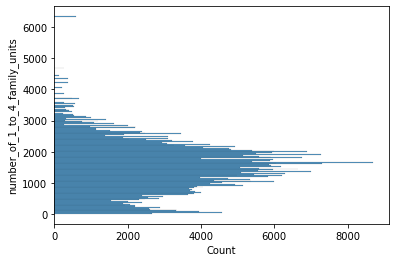

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=hmda['number_of_1_to_4_family_units'], y=hmda['number_of_1_to_4_family_units'])

In [ ]:
hmda.loc[hmda['number_of_1_to_4_family_units'].between(0.0,1000.0), 'num_of_1_to_4_family_units'] = 1 #'0-1000'
hmda.loc[hmda['number_of_1_to_4_family_units'].between(1000.1,2000.0), 'num_of_1_to_4_family_units'] = 2 #'1000-2000'
hmda.loc[hmda['number_of_1_to_4_family_units'].between(2000.1,3000.0), 'num_of_1_to_4_family_units'] = 3 #'2000-3000'
hmda.loc[hmda['number_of_1_to_4_family_units'].between(3000.1,7000.0), 'num_of_1_to_4_family_units'] = 4 #'>3000'

In [ ]:
hmda.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'population', 'tract_to_msamd_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units'],
      dtype='object')

In [ ]:
hmda.drop(["number_of_1_to_4_family_units"], axis = 1, inplace = True) #cancelliamo la variabile 

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack() #controllo 

action_taken                    1.000000         228054.0
                                2.000000          14180.0
                                3.000000          79697.0
                                4.000000          39496.0
                                5.000000          16733.0
                                6.000000          61490.0
                                7.000000              4.0
agency_code                     1.000000          34741.0
                                2.000000          10211.0
                                3.000000          15555.0
                                5.000000          50944.0
                                7.000000         150441.0
                                9.000000         177762.0
applicant_ethnicity             1.000000          25073.0
                                2.000000         320515.0
                                3.000000          43358.0
                                4.000000          50708.0
applicant_race

ora procediamo con lo stesso metodo per la variabile number_of_owner_occupied_units

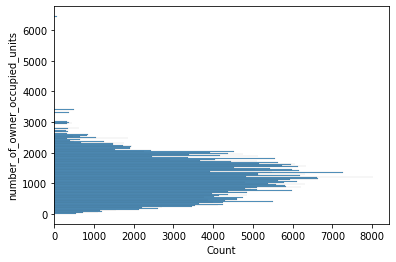

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=hmda['number_of_owner_occupied_units'], y=hmda['number_of_owner_occupied_units'])

In [ ]:
max = hmda["number_of_owner_occupied_units"].max()
min = hmda["number_of_owner_occupied_units"].min()
max,min

(6454.0, 2.0)

In [ ]:
hmda.loc[hmda['number_of_owner_occupied_units'].between(2.0,1000.0), 'num_of_owner_occupied_units'] =1 #'0-1000'
hmda.loc[hmda['number_of_owner_occupied_units'].between(1000.1,2000.0), 'num_of_owner_occupied_units'] = 2# '1000-2000'
hmda.loc[hmda['number_of_owner_occupied_units'].between(2000.1,3000.0), 'num_of_owner_occupied_units'] = 3 #'2000-3000'
hmda.loc[hmda['number_of_owner_occupied_units'].between(3000.1,7000.0), 'num_of_owner_occupied_units'] = 4 #'>3000'

In [ ]:
hmda.drop(["number_of_owner_occupied_units"], axis = 1, inplace = True) #cancelliamo la variabile 

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'population', 'tract_to_msamd_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units'],
      dtype='object')

variabile population

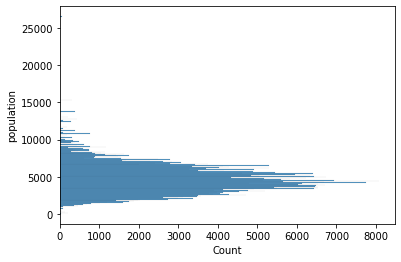

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=hmda['population'], y=hmda['population'])

In [ ]:
max = hmda["population"].max()
min = hmda["population"].min()
max,min

(26588.0, 1.0)

In [ ]:
hmda.loc[hmda['population'].between(2.0,1000.0), 'population_tot'] = 1 #'0-1000'
hmda.loc[hmda['population'].between(1000.1,5000.0), 'population_tot'] = 2 #'1000-5000'
hmda.loc[hmda['population'].between(5000.1,10000.0), 'population_tot'] = 3 #'5000-10000'
hmda.loc[hmda['population'].between(10000.1,270000.0), 'population_tot'] = 4 #'>10000'

In [ ]:
hmda.drop(["population"], axis = 1, inplace = True) #cancelliamo la variabile 

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income',
       'tract_to_msamd_income', 'income', 'loan_amount', 'minority_pop',
       'num_of_1_to_4_family_units', 'num_of_owner_occupied_units',
       'population_tot'],
      dtype='object')

variabile tract_to_msamd_income

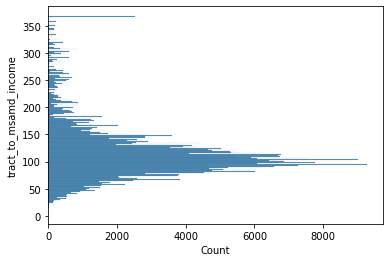

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=hmda['tract_to_msamd_income'], y=hmda['tract_to_msamd_income'])

In [ ]:
max = hmda["tract_to_msamd_income"].max()
min = hmda["tract_to_msamd_income"].min()
max,min

(367.6099853515625, 3.670000076293945)

In [ ]:
hmda.loc[hmda['tract_to_msamd_income'].between(2.0,50.0), 'msamd_income'] = 1#'0-50'
hmda.loc[hmda['tract_to_msamd_income'].between(50.1,100.0), 'msamd_income'] = 2 #'50-100'
hmda.loc[hmda['tract_to_msamd_income'].between(100.1,150.0), 'msamd_income'] = 3 #'100-150'
hmda.loc[hmda['tract_to_msamd_income'].between(150.1,200.0), 'msamd_income'] = 4 #'150-200'
hmda.loc[hmda['tract_to_msamd_income'].between(200.1,250.0), 'msamd_income'] = 5 #'200-250'
hmda.loc[hmda['tract_to_msamd_income'].between(250.1,300.0), 'msamd_income'] = 6 #'250-300'
hmda.loc[hmda['tract_to_msamd_income'].between(300.1,370.0), 'msamd_income'] = 7 #'>300'

In [ ]:
hmda.drop(["tract_to_msamd_income"], axis = 1, inplace = True) #cancelliamo la variabile 

In [ ]:
hmda.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income', 'income',
       'loan_amount', 'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.0         228054.0
                             2.0          14180.0
                             3.0          79697.0
                             4.0          39496.0
                             5.0          16733.0
                             6.0          61490.0
                             7.0              4.0
agency_code                  1.0          34741.0
                             2.0          10211.0
                             3.0          15555.0
                             5.0          50944.0
                             7.0         150441.0
                             9.0         177762.0
applicant_ethnicity          1.0          25073.0
                             2.0         320515.0
                             3.0          43358.0
                             4.0          50708.0
applicant_race_1             1.0           1712.0
                             2.0          27890.0
                             3.0          28687.0


In [ ]:
hmda.head()

action_taken  agency_code  applicant_ethnicity  applicant_race_1  \
0             1            9                    2                 5   
1             1            9                    2                 5   
2             1            7                    2                 3   
3             1            9                    2                 5   
4             1            9                    2                 5   

   applicant_sex  application_date_indicator  co_applicant_ethnicity  \
0              2                           0                       5   
1              1                           0                       5   
2              1                           0                       5   
3              1                           0                       2   
4              1                           0                       5   

   co_applicant_race_1  co_applicant_race_4  co_applicant_sex  ...  \
0                    8                  NaN                 5  ...   
1                    8                  NaN                 5  ...   
2                    8                  NaN                 5  ...   
3                    5                  NaN                 2  ...   
4                    8                  NaN                 5  ...   

   property_type  purchaser_type  hud_median_family_income  income  \
0              1               0                  109000.0    11.0   
1              1               6                   71300.0    12.0   
2              1               3                   71300.0     NaN   
3              1               0                  109000.0    13.0   
4              1               0                  109000.0    13.0   

   loan_amount  minority_pop  num_of_1_to_4_family_units  \
0         12.0           1.0                         1.0   
1         15.0           2.0                         1.0   
2         13.0           2.0                         3.0   
3         18.0           1.0                         2.0   
4         17.0           2.0                         1.0   

   num_of_owner_occupied_units  population_tot  msamd_income  
0                          2.0             3.0           3.0  
1                          1.0             2.0           4.0  
2                          3.0             3.0           3.0  
3                          3.0             3.0           4.0  
4                          1.0             2.0           3.0  

[5 rows x 28 columns]

In [ ]:
hmda.shape

(439654, 28)

**Analisi esplorativa + pre processing** 

In [ ]:
hmda.head()

action_taken  agency_code  applicant_ethnicity  applicant_race_1  \
0             1            9                    2                 5   
1             1            9                    2                 5   
2             1            7                    2                 3   
3             1            9                    2                 5   
4             1            9                    2                 5   

   applicant_sex  application_date_indicator  co_applicant_ethnicity  \
0              2                           0                       5   
1              1                           0                       5   
2              1                           0                       5   
3              1                           0                       2   
4              1                           0                       5   

   co_applicant_race_1  co_applicant_race_4  co_applicant_sex  ...  \
0                    8                  NaN                 5  ...   
1                    8                  NaN                 5  ...   
2                    8                  NaN                 5  ...   
3                    5                  NaN                 2  ...   
4                    8                  NaN                 5  ...   

   property_type  purchaser_type  hud_median_family_income  income  \
0              1               0                  109000.0    11.0   
1              1               6                   71300.0    12.0   
2              1               3                   71300.0     NaN   
3              1               0                  109000.0    13.0   
4              1               0                  109000.0    13.0   

   loan_amount  minority_pop  num_of_1_to_4_family_units  \
0         12.0           1.0                         1.0   
1         15.0           2.0                         1.0   
2         13.0           2.0                         3.0   
3         18.0           1.0                         2.0   
4         17.0           2.0                         1.0   

   num_of_owner_occupied_units  population_tot  msamd_income  
0                          2.0             3.0           3.0  
1                          1.0             2.0           4.0  
2                          3.0             3.0           3.0  
3                          3.0             3.0           4.0  
4                          1.0             2.0           3.0  

[5 rows x 28 columns]

In [ ]:
hmda.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_4',
       'co_applicant_sex', 'county_code', 'hoepa_status', 'lien_status',
       'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval',
       'property_type', 'purchaser_type', 'hud_median_family_income', 'income',
       'loan_amount', 'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda.shape

(439654, 28)

28 colonne, 440k osservazioni riguardanti coloro che hanno chiesto un prestito per un mutuo nell'anno 2015 nello stato di new york 

**duplicati**

controlliamo se ci sono dei duplicati 

In [ ]:
duplicate_rows_df = hmda[hmda.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (33499, 28)


ci sono 33k duplicati che procediamo a togliere 

In [ ]:
hmda = hmda.drop_duplicates() #abbiamo tolto i duplicati 

In [ ]:
hmda.shape

(406155, 28)

abbiamo creato un nuovo dataset senza le righe duplicate

**missing values**

controlliamo la presenza di valori mancanti 

In [ ]:
print(hmda.isnull().sum())

action_taken                        0
agency_code                         0
applicant_ethnicity                 0
applicant_race_1                    0
applicant_sex                       0
application_date_indicator          0
co_applicant_ethnicity              0
co_applicant_race_1                 0
co_applicant_race_4            406151
co_applicant_sex                    0
county_code                      1030
hoepa_status                        0
lien_status                         0
loan_purpose                        0
loan_type                           0
msamd                           35050
owner_occupancy                     0
preapproval                         0
property_type                       0
purchaser_type                      0
hud_median_family_income         1452
income                          49453
loan_amount                         0
minority_pop                     1622
num_of_1_to_4_family_units       1995
num_of_owner_occupied_units      1827
population_t

sembrano esserci dei valori nulli. Notiamo che le variabili "co_applicant_race_4" e "co_applicant_race5" presentano tutti valori mancanti perciò procediamo ad eliminare queste due variabili. 

In [ ]:
hmda.drop(["co_applicant_race_4"], axis = 1, inplace = True) #cancelliamo le variabili #• "co_applicant_race_5"

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(hmda.isnull().sum())

action_taken                       0
agency_code                        0
applicant_ethnicity                0
applicant_race_1                   0
applicant_sex                      0
application_date_indicator         0
co_applicant_ethnicity             0
co_applicant_race_1                0
co_applicant_sex                   0
county_code                     1030
hoepa_status                       0
lien_status                        0
loan_purpose                       0
loan_type                          0
msamd                          35050
owner_occupancy                    0
preapproval                        0
property_type                      0
purchaser_type                     0
hud_median_family_income        1452
income                         49453
loan_amount                        0
minority_pop                    1622
num_of_1_to_4_family_units      1995
num_of_owner_occupied_units     1827
population_tot                  1485
msamd_income                    2278
d

In [ ]:
na = hmda[hmda.isna().any(axis=1)]
na.to_csv('na.csv')
!cp na.csv "drive/My Drive/stat_spaziale/" #inserire il proprio path 

date le dimensioni del dataset non mi faceva vedere il dataset qua, perciò ho creato un file csv che contiene tutte le righe con i dati mancanti per controllarlo in un altra sede

non sembra esserci un pattern nei dati mancanti; non ha molto senso derivare dati geografici, perciò procediamo con l'eliminazione delle righe che presentano valori mancanti nelle variabili conty_name e msmad. questo perchè non ha senso derivare informazioni geografiche con la mice imputation. inoltre togliamo anche la variabile population tot, sempre per lo stesso motivo.  togliamo le righe con i dati mancanti perchè il nostro scopo è allenare una rete neurale, che è sensibile alla presenza di valori mancanti. 

In [ ]:
hmda = hmda[hmda['county_code'].notna()] 

In [ ]:
hmda = hmda[hmda['msamd'].notna()] 

In [ ]:
hmda = hmda[hmda['population_tot'].notna()]

abbiamo creato un dataset che contiene solo le righe che presentano valori non mancanti nelle colonne "county_name" e "msamd"

In [ ]:
hmda.shape #controllo 

(371070, 27)

In [ ]:
print(hmda.isnull().sum())

action_taken                       0
agency_code                        0
applicant_ethnicity                0
applicant_race_1                   0
applicant_sex                      0
application_date_indicator         0
co_applicant_ethnicity             0
co_applicant_race_1                0
co_applicant_sex                   0
county_code                        0
hoepa_status                       0
lien_status                        0
loan_purpose                       0
loan_type                          0
msamd                              0
owner_occupancy                    0
preapproval                        0
property_type                      0
purchaser_type                     0
hud_median_family_income           0
income                         46012
loan_amount                        0
minority_pop                      18
num_of_1_to_4_family_units       512
num_of_owner_occupied_units      339
population_tot                     0
msamd_income                     691
d

togliendo le righe con valori mancanti su county_name e msamd abbiamo notevolemnte ridotto il numero di righe con valori mancanti

In [ ]:
na1 = hmda[hmda.isna().any(axis=1)]
na1.to_csv('na1.csv')
!cp na1.csv "drive/My Drive/stat_spaziale/" #inserire il proprio path 

abbiamo creato un nuovo dataset che presenta solo le righe con i valori mancanti 

**missing data**
per le restanti variabili effettuiamo un KNN 

In [ ]:
#!pip install miceforest

In [ ]:
#import miceforest as mf
#import pandas as pd
#kernel = mf.ImputationKernel(
#  data=hmda,
#  save_all_iterations=True,
#  random_state=1991
#)

# Run the MICE algorithm for 3 iterations on each of the datasets
#kernel.mice(3,verbose=True)
# Our new dataset
#hmda_new = hmda.iloc[range(50)]
# Make a multiple imputed dataset with our new data
#hmda_new_data_imputed = kernel.impute_new_data(hmda_new)
# Return a completed dataset
#new_completed_data = hmda_new_data_imputed.complete_data(0)


In [ ]:
hmda.shape

(371070, 27)

In [ ]:
hmda.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
#from sklearn.impute import KNNImputer
#hmda_knn = hmda
#knn = KNNImputer(n_neighbors=2, add_indicator=True)
#knn.fit(hmda_knn)
#hmda_knn = knn.transform(hmda_knn)

In [ ]:
#hmda_knn = pd.DataFrame(hmda_knn, columns = ["action_taken" ,
#"agency_code" ,
#"applicant_ethnicity" , 
#"applicant_race_1" ,    
#"applicant_sex" ,
#"application_date_indicator" ,
#"co_applicant_ethnicity",
#"co_applicant_race_1" ,
#"co_applicant_sex" ,
#"county_code",
#"hoepa_status" ,
#"lien_status",
#"loan_purpose"  ,
#"loan_type",
#"msamd" ,
#"owner_occupancy",
#"preapproval" ,
#"property_type",
#"purchaser_type",
#"hud_median_family_income",
#"income"  ,
#"loan_amount" ,
#"minority_pop" ,
#"num_of_1_to_4_family_units" ,
#"num_of_owner_occupied_units",
#"population_tot" ,
#"msamd_income", 
#"a", 
#"b",
#"c", 
#"d", 
#"e" ]) #convertire l'oggetto numpy di nuovo in un dataframe

In [ ]:
#hmda_knn.to_csv('hmda_knn.csv')
#!cp hmda_knn.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_knn = pd.read_csv(filepath + "hmda_knn.csv")

salvato il risultato in un dataset esterno 

In [ ]:
hmda_knn.shape

(371070, 33)

In [ ]:
print(hmda_knn.isnull().sum())

Unnamed: 0                     0
action_taken                   0
agency_code                    0
applicant_ethnicity            0
applicant_race_1               0
applicant_sex                  0
application_date_indicator     0
co_applicant_ethnicity         0
co_applicant_race_1            0
co_applicant_sex               0
county_code                    0
hoepa_status                   0
lien_status                    0
loan_purpose                   0
loan_type                      0
msamd                          0
owner_occupancy                0
preapproval                    0
property_type                  0
purchaser_type                 0
hud_median_family_income       0
income                         0
loan_amount                    0
minority_pop                   0
num_of_1_to_4_family_units     0
num_of_owner_occupied_units    0
population_tot                 0
msamd_income                   0
a                              0
b                              0
c         

controlliamo che non c'è nessun dato mancante nel datset 

In [ ]:
hmda_knn.shape

(371070, 33)

In [ ]:
hmda_knn.columns

Index(['Unnamed: 0', 'action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income', 'a',
       'b', 'c', 'd', 'e'],
      dtype='object')

In [ ]:
hmda_knn.head()

Unnamed: 0  action_taken  agency_code  applicant_ethnicity  \
0           0           1.0          9.0                  2.0   
1           1           1.0          9.0                  2.0   
2           2           1.0          7.0                  2.0   
3           3           1.0          9.0                  2.0   
4           4           1.0          9.0                  2.0   

   applicant_race_1  applicant_sex  application_date_indicator  \
0               5.0            2.0                         0.0   
1               5.0            1.0                         0.0   
2               3.0            1.0                         0.0   
3               5.0            1.0                         0.0   
4               5.0            1.0                         0.0   

   co_applicant_ethnicity  co_applicant_race_1  co_applicant_sex  ...  \
0                     5.0                  8.0               5.0  ...   
1                     5.0                  8.0               5.0  ...   
2                     5.0                  8.0               5.0  ...   
3                     2.0                  5.0               2.0  ...   
4                     5.0                  8.0               5.0  ...   

   minority_pop  num_of_1_to_4_family_units  num_of_owner_occupied_units  \
0           1.0                         1.0                          2.0   
1           2.0                         1.0                          1.0   
2           2.0                         3.0                          3.0   
3           1.0                         2.0                          3.0   
4           2.0                         1.0                          1.0   

   population_tot  msamd_income    a    b    c    d    e  
0             3.0           3.0  0.0  0.0  0.0  0.0  0.0  
1             2.0           4.0  0.0  0.0  0.0  0.0  0.0  
2             3.0           3.0  1.0  0.0  0.0  0.0  0.0  
3             3.0           4.0  0.0  0.0  0.0  0.0  0.0  
4             2.0           3.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 33 columns]

In [ ]:
hmda_knn.nunique()

Unnamed: 0                     371070
action_taken                        7
agency_code                         6
applicant_ethnicity                 4
applicant_race_1                    7
applicant_sex                       4
application_date_indicator          3
co_applicant_ethnicity              5
co_applicant_race_1                 8
co_applicant_sex                    5
county_code                        38
hoepa_status                        2
lien_status                         4
loan_purpose                        3
loan_type                           4
msamd                              14
owner_occupancy                     3
preapproval                         3
property_type                       3
purchaser_type                     10
hud_median_family_income           14
income                             49
loan_amount                        31
minority_pop                        6
num_of_1_to_4_family_units          6
num_of_owner_occupied_units         6
population_t

nel nuovo dataset sono aumentati i livelli delle variabili dove erano presenti na questo perchè sono stati creati nuovi livelli dal knn. nonostante abbiamo risolto il problema dei dati mancanti proviamo a far andare una mice imputation perchè il knn richiede troppe risorse computazionali 

In [ ]:
#hmda.to_csv('hmda_pre_reg.csv')
#!cp hmda_pre_reg.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_pre_reg = pd.read_csv(filepath + "hmda_pre_reg.csv")

In [ ]:
hmda_pre_reg.columns

Index(['Unnamed: 0', 'action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda_pre_reg.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
hmda_pre_reg =imp.fit_transform(hmda_pre_reg)

[IterativeImputer] Completing matrix with shape (371070, 27)
[IterativeImputer] Ending imputation round 1/10, elapsed time 16.65
[IterativeImputer] Change: 14.785550100986523, scaled tolerance: 109.0 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
hmda_pre_reg.shape

(371070, 27)

In [ ]:
hmda_pre_reg = pd.DataFrame(hmda_pre_reg, columns = ['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
      'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'])

In [ ]:
print(hmda_pre_reg.isnull().sum())

action_taken                   0
agency_code                    0
applicant_ethnicity            0
applicant_race_1               0
applicant_sex                  0
application_date_indicator     0
co_applicant_ethnicity         0
co_applicant_race_1            0
co_applicant_sex               0
county_code                    0
hoepa_status                   0
lien_status                    0
loan_purpose                   0
loan_type                      0
msamd                          0
owner_occupancy                0
preapproval                    0
property_type                  0
purchaser_type                 0
hud_median_family_income       0
income                         0
loan_amount                    0
minority_pop                   0
num_of_1_to_4_family_units     0
num_of_owner_occupied_units    0
population_tot                 0
msamd_income                   0
dtype: int64


In [ ]:
hmda_pre_reg.to_csv('hmda_reg.csv')
!cp hmda_reg.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_reg = pd.read_csv(filepath + "hmda_reg.csv") #salviamo il datset in csv esterno 

In [ ]:
hmda_reg.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
hmda_reg.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda_reg = hmda_reg.round(decimals = 2)

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.00         193706.0
                             2.00          12655.0
                             3.00          67958.0
                             4.00          35235.0
                             5.00          15048.0
                             6.00          46464.0
                             7.00              4.0
agency_code                  1.00          25560.0
                             2.00           7832.0
                             3.00          13036.0
                             5.00          42527.0
                             7.00         127232.0
                             9.00         154883.0
applicant_ethnicity          1.00          24043.0
                             2.00         270944.0
                             3.00          39427.0
                             4.00          36656.0
applicant_race_1             1.00           1504.0
                             2.00          26851.0
                             3.

la mice imputation ha creato dei nuovi valori, non solo quelli corrispondenti al valore delle classi da noi create,perciò procediamo a raggruppare di nuovo le variabili con il medesimo criterio precedente. inoltre decidiamo di procedere definitavamente con queste metodo perchè richiede meno tempo. 

In [ ]:
hmda_reg.loc[hmda_reg['income'].between(1.00, 1.99), 'income'] = 1 #'1-5'
hmda_reg.loc[hmda_reg['income'].between(2.00,2.99), 'income'] = 2 #'5-10'
hmda_reg.loc[hmda_reg['income'].between(3.00,3.99), 'income'] = 3 #'10-20'
hmda_reg.loc[hmda_reg['income'].between(4.00,4.99), 'income'] = 4 #'20-30'
hmda_reg.loc[hmda_reg['income'].between(5.00,5.99), 'income'] =  5 #'30-40'
hmda_reg.loc[hmda_reg['income'].between(6.00,6.99), 'income'] = 6 #'40-50'
hmda_reg.loc[hmda_reg['income'].between(7.00,7.99), 'income'] = 7 #'50-60'
hmda_reg.loc[hmda_reg['income'].between(8.00,8.99), 'income'] =8 # '60-70'
hmda_reg.loc[hmda_reg['income'].between(9.00,9.99), 'income'] = 9 #'70-80'
hmda_reg.loc[hmda_reg['income'].between(10.00,10.99), 'income'] = 10 #'80-90'
hmda_reg.loc[hmda_reg['income'].between(11.00,11.99), 'income'] = 11 #'90-100'
hmda_reg.loc[hmda_reg['income'].between(12.00,12.99), 'income'] = 12 #'100-200'
hmda_reg.loc[hmda_reg['income'].between(13.00,13.99), 'income'] = 13# '200-300'
hmda_reg.loc[hmda_reg['income'].between(14.00,14.99), 'income'] = 14 #'300-400'
hmda_reg.loc[hmda_reg['income'].between(15.00,15.99), 'income'] = 15 #'400-500'
hmda_reg.loc[hmda_reg['income'].between(16.00,16.99), 'income'] = 16 #'500-600'
hmda_reg.loc[hmda_reg['income'].between(17.00,17.99), 'income'] = 17 #'600-700'
hmda_reg.loc[hmda_reg['income'].between(18.00,18.99), 'income'] = 18 #'700-800'
hmda_reg.loc[hmda_reg['income'].between(19.00,19.99), 'income'] = 19 #'800-900'
hmda_reg.loc[hmda_reg['income'].between(20.00,20.99), 'income'] = 20 #'900-1000'
hmda_reg.loc[hmda_reg['income'].between(21.00,21.99), 'income'] = 21 #'1000-2000'
hmda_reg.loc[hmda_reg['income'].between(22.00,22.99), 'income'] = 22 #'2000-3000'
hmda_reg.loc[hmda_reg['income'].between(23.00,23.99), 'income'] = 23 #'3000-4000'
hmda_reg.loc[hmda_reg['income'].between(24.00,24.99), 'income'] = 24 #'4000-5000'
hmda_reg.loc[hmda_reg['income'].between(25.00,25.99), 'income'] = 25 #'5000-9999'

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.00         193706.0
                             2.00          12655.0
                             3.00          67958.0
                             4.00          35235.0
                             5.00          15048.0
                             6.00          46464.0
                             7.00              4.0
agency_code                  1.00          25560.0
                             2.00           7832.0
                             3.00          13036.0
                             5.00          42527.0
                             7.00         127232.0
                             9.00         154883.0
applicant_ethnicity          1.00          24043.0
                             2.00         270944.0
                             3.00          39427.0
                             4.00          36656.0
applicant_race_1             1.00           1504.0
                             2.00          26851.0
                             3.

In [ ]:
hmda_reg.loc[hmda_reg['minority_pop'].between(1.00, 1.99), 'minority_pop'] = 1 #'1-5'
hmda_reg.loc[hmda_reg['minority_pop'].between(2.00,2.99), 'minority_pop'] = 2 #'5-10'
hmda_reg.loc[hmda_reg['minority_pop'].between(3.00,3.99), 'minority_pop'] = 3 #'10-20'
hmda_reg.loc[hmda_reg['minority_pop'].between(4.00,4.99), 'minority_pop'] = 4 #'20-30'


In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.00         193706.0
                             2.00          12655.0
                             3.00          67958.0
                             4.00          35235.0
                             5.00          15048.0
                             6.00          46464.0
                             7.00              4.0
agency_code                  1.00          25560.0
                             2.00           7832.0
                             3.00          13036.0
                             5.00          42527.0
                             7.00         127232.0
                             9.00         154883.0
applicant_ethnicity          1.00          24043.0
                             2.00         270944.0
                             3.00          39427.0
                             4.00          36656.0
applicant_race_1             1.00           1504.0
                             2.00          26851.0
                             3.

In [ ]:
hmda_reg.loc[hmda_reg['num_of_1_to_4_family_units'].between(0.00, 1.99), 'num_of_1_to_4_family_units'] = 1 #'1-5'
hmda_reg.loc[hmda_reg['num_of_1_to_4_family_units'].between(2.00,2.99), 'num_of_1_to_4_family_units'] = 2 #'5-10'
hmda_reg.loc[hmda_reg['num_of_1_to_4_family_units'].between(3.00,3.99), 'num_of_1_to_4_family_units'] = 3 #'10-20'
hmda_reg.loc[hmda_reg['num_of_1_to_4_family_units'].between(4.00,4.99), 'num_of_1_to_4_family_units'] = 4 #'20-30'

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.00         193706.0
                             2.00          12655.0
                             3.00          67958.0
                             4.00          35235.0
                             5.00          15048.0
                             6.00          46464.0
                             7.00              4.0
agency_code                  1.00          25560.0
                             2.00           7832.0
                             3.00          13036.0
                             5.00          42527.0
                             7.00         127232.0
                             9.00         154883.0
applicant_ethnicity          1.00          24043.0
                             2.00         270944.0
                             3.00          39427.0
                             4.00          36656.0
applicant_race_1             1.00           1504.0
                             2.00          26851.0
                             3.

In [ ]:
hmda_reg.loc[hmda_reg['num_of_owner_occupied_units'].between(0.00, 1.99), 'num_of_owner_occupied_units'] = 1 #'1-5'
hmda_reg.loc[hmda_reg['num_of_owner_occupied_units'].between(2.00,2.99), 'num_of_owner_occupied_units'] = 2 #'5-10'
hmda_reg.loc[hmda_reg['num_of_owner_occupied_units'].between(3.00,3.99), 'num_of_owner_occupied_units'] = 3 #'10-20'
hmda_reg.loc[hmda_reg['num_of_owner_occupied_units'].between(4.00,4.99), 'num_of_owner_occupied_units'] = 4 #'20-30'

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.00         193706.0
                             2.00          12655.0
                             3.00          67958.0
                             4.00          35235.0
                             5.00          15048.0
                             6.00          46464.0
                             7.00              4.0
agency_code                  1.00          25560.0
                             2.00           7832.0
                             3.00          13036.0
                             5.00          42527.0
                             7.00         127232.0
                             9.00         154883.0
applicant_ethnicity          1.00          24043.0
                             2.00         270944.0
                             3.00          39427.0
                             4.00          36656.0
applicant_race_1             1.00           1504.0
                             2.00          26851.0
                             3.

In [ ]:
hmda_reg.loc[hmda_reg['msamd_income'].between(0.00, 1.99), 'msamd_income'] = 1 #'1-5'
hmda_reg.loc[hmda_reg['msamd_income'].between(2.00,2.99), 'msamd_income'] = 2 #'5-10'
hmda_reg.loc[hmda_reg['msamd_income'].between(3.00,3.99), 'msamd_income'] = 3 #'10-20'
hmda_reg.loc[hmda_reg['msamd_income'].between(4.00,4.99), 'msamd_income'] = 4 #'20-30'
hmda_reg.loc[hmda_reg['msamd_income'].between(5.00,5.99), 'msamd_income'] = 5
hmda_reg.loc[hmda_reg['msamd_income'].between(6.00,6.99), 'msamd_income'] = 6 
hmda_reg.loc[hmda_reg['msamd_income'].between(7.00,7.99), 'msamd_income'] = 7 

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 1.0         193706.0
                             2.0          12655.0
                             3.0          67958.0
                             4.0          35235.0
                             5.0          15048.0
                             6.0          46464.0
                             7.0              4.0
agency_code                  1.0          25560.0
                             2.0           7832.0
                             3.0          13036.0
                             5.0          42527.0
                             7.0         127232.0
                             9.0         154883.0
applicant_ethnicity          1.0          24043.0
                             2.0         270944.0
                             3.0          39427.0
                             4.0          36656.0
applicant_race_1             1.0           1504.0
                             2.0          26851.0
                             3.0          26980.0


abbiamo due missing data imputation una con il knn e una con la regressione logistica; per ora proseguo con quella della reg logistica perchè mi richiede meno potere computazionale

prossime cose da fare: 
capira cosa sono le nuove variabili
verificare che i na sia di tipo MAR
capire il senso di alcune variabili(soprautto min_pop e pop) 
fare una lista in bella con una descrizione di tutte le variabili ed una lor ocodifica
**chiedere prof** se preprocessing prima o dopo aver splittato il dataset

In [ ]:
#hmda_reg_describe = hmda_reg.describe
#hmda_reg_describe.to_csv('hmda_reg_describe.csv')
#!cp hmda_reg_describe.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_reg.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

la creazione del nuovo dataset ha creato una nuovo colonna id che togliamo

**codifica target**
il nostro target è la variabile action_taken che ci dice se il mutuo è stato ottenuto oppure no, ma questa variabile più di due livelli, mentre le reti neurali hanno bisogno di un target 0-1; perciò procediamo alla ricodifica del target; 0 per tutti coloro che non hanno ottenuto il mutuo e 1 per tutti colori che invece l'hanno ottenuto

In [ ]:
hmda_reg.nunique()#vediamo quanti livelli ha la variabile "action_taken"

action_taken                    7
agency_code                     6
applicant_ethnicity             4
applicant_race_1                7
applicant_sex                   4
application_date_indicator      3
co_applicant_ethnicity          5
co_applicant_race_1             8
co_applicant_sex                5
county_code                    38
hoepa_status                    2
lien_status                     4
loan_purpose                    3
loan_type                       4
msamd                          14
owner_occupancy                 3
preapproval                     3
property_type                   3
purchaser_type                 10
hud_median_family_income       14
income                         25
loan_amount                    31
minority_pop                    4
num_of_1_to_4_family_units      4
num_of_owner_occupied_units     4
population_tot                  4
msamd_income                    7
dtype: int64

action taken ha 7 livelli; 
1 -- Loan originated
2 -- Application approved but not accepted
3 -- Application denied by financial institution
4 -- Application withdrawn by applicant
5 -- File closed for incompleteness
6 -- Loan purchased by the institution
7 -- Preapproval request denied by financial institution
codifichiamo 1 e 6 come 1 e 2, 3, 4, 5, 7 come 0. dove 1 significa mutuo ottenuto e 0 non ottenuto 

In [ ]:
mapper = {1: 1, 2: 0,  3: 0, 4:0, 5: 0 ,6: 1, 7: 0}
hmda_reg['action_taken'] = hmda_reg['action_taken'].map(mapper).fillna(hmda_reg['action_taken'])

In [ ]:
hmda_reg.nunique()

action_taken                    2
agency_code                     6
applicant_ethnicity             4
applicant_race_1                7
applicant_sex                   4
application_date_indicator      3
co_applicant_ethnicity          5
co_applicant_race_1             8
co_applicant_sex                5
county_code                    38
hoepa_status                    2
lien_status                     4
loan_purpose                    3
loan_type                       4
msamd                          14
owner_occupancy                 3
preapproval                     3
property_type                   3
purchaser_type                 10
hud_median_family_income       14
income                         25
loan_amount                    31
minority_pop                    4
num_of_1_to_4_family_units      4
num_of_owner_occupied_units     4
population_tot                  4
msamd_income                    7
dtype: int64

**multicollinearità** 
le reti neurali sono sensibili anche alla presenza di collinearità tra le variabili del dataset perciò dato che tutte le nostre variabili sono categoriali procediamo con il calcolo del test chi quadro normalizzato per verificare la dipendenza o meno delle variabili tra di loro ed eliminiamo quelle che presentano un chi quadro maggiore di 0.90

In [ ]:
#import numpy as np
#!pip install pandas== 0.21
#from scipy.stats import chi2_contingency
#num_cells = np.multiply(371070, 28, dtype=np.int64)
#factors_paired = [(i,j) for i in hmda_reg.columns.values for j in hmda_reg.columns.values] 

#chi2, p_values =[], []

#for f in factors_paired:
#    if f[0] != f[1]:
#        chitest = chi2_contingency(pd.crosstab(hmda_reg[f[0]], hmda_reg[f[1]]))   
#        chi2.append(chitest[0])
#        p_values.append(chitest[1])
#    else:      # for same factor pair
#        chi2.append(0)
#        p_values.append(0)

#chi2 = np.array(chi2).reshape((23,23)) # shape it as a matrix
#chi2 = pd.DataFrame(chi2, index=hmda_reg.columns.values, columns=hmda_reg.columns.values) # then a df for convenience
#!pip install pandas

In [ ]:
#import pandas as pd 
#from tqdm import tqdm

#chunk_size = 50000
#chunks = [x for x in range(0, hmda_reg.shape[0], chunk_size)]

#for i in range(0, len(chunks) - 1):
#    print(chunks[i], chunks[i + 1] - 1)

#pivot_df = pd.DataFrame()

#for i in tqdm(range(0, len(chunks) - 1)):
#    chunk_df = hmda_reg.iloc[ chunks[i]:chunks[i + 1] - 1]
#    interactions = (chunk_df.groupby([user_col, item_col])[rating_col]
#      .sum()
#      .unstack()
#      .reset_index()
#      .fillna(0)
#      .set_index(user_col)
#    )
#    print (interactions.shape)
#    pivot_df = pivot_df.append(interactions, sort=False) 

i due metodi per calcolare il test chi quadro falliscono data la numerosità del dataset; per gestire la multicollinearità procediamo con una model selection. 

**model selection**

utilizziamo un albero per effettuare la model selection

In [ ]:
#hmda_no_y = hmda_reg
#hmda_no_y.to_csv('hmda_no_y.csv')
#!cp hmda_no_y.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_reg.to_csv('hmda_no_y.csv')
!cp hmda_no_y.csv "drive/My Drive/stat_spaziale/"

In [ ]:
hmda_no_y = pd.read_csv(filepath + "hmda_no_y.csv")

In [ ]:
y = hmda_no_y["action_taken"]
hmda_no_y.drop(["action_taken", "Unnamed: 0"], axis = 1, inplace = True)

per la model selection abbiamo bisogno del dataset senza la variabile target che memorizziamo nella variabile y e inoltre eliminiamo la solita colonna "Unnamed: 0" che si crea ogni volta che importiamo nuovamente un dataset

In [ ]:
hmda_reg.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda_no_y.columns

Index(['agency_code', 'applicant_ethnicity', 'applicant_race_1',
       'applicant_sex', 'application_date_indicator', 'co_applicant_ethnicity',
       'co_applicant_race_1', 'co_applicant_sex', 'county_code',
       'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'msamd',
       'owner_occupancy', 'preapproval', 'property_type', 'purchaser_type',
       'hud_median_family_income', 'income', 'loan_amount', 'minority_pop',
       'num_of_1_to_4_family_units', 'num_of_owner_occupied_units',
       'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
hmda_no_y.shape

(371070, 26)

In [ ]:
import pandas as pd
import numpy as np
X = hmda_no_y
  #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization


[5.57792013e-02 1.87144312e-02 1.72894065e-02 2.61405194e-02
 4.05583336e-02 6.75560920e-03 6.68570302e-03 8.32986710e-03
 3.41159850e-02 6.30141831e-05 2.67714054e-02 4.46433793e-02
 1.62900307e-02 1.59965501e-02 8.48058623e-03 1.07899650e-02
 4.12781011e-03 3.73851814e-01 1.50546927e-02 8.35220160e-02
 8.17178857e-02 1.92679432e-02 2.05064528e-02 1.70394645e-02
 1.54933866e-02 3.20145467e-02]


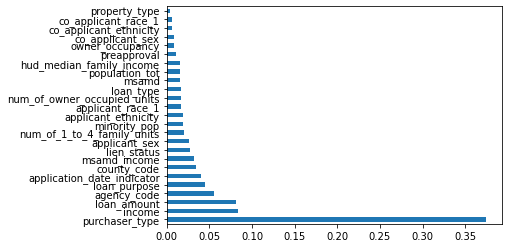

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

la variabile più importante risulta essere "purchaser_type" seguita da "income" e "loan_amount". mentre le variabili meno importanti sembrano essere "property_type" e "co_applicant_race_1". dato che nessuna variabile va a esattamente zero, scegliamo comunque di tenerle tutte 

**Centering and scaling**; non ne abbiamo bisogno dato che abbiamo solo variabili categoriali

**Near zero variance**
 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.1):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

print(fs_variance(hmda_reg))

['action_taken', 'agency_code', 'applicant_ethnicity', 'applicant_race_1', 'applicant_sex', 'application_date_indicator', 'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex', 'county_code', 'lien_status', 'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount', 'minority_pop', 'num_of_1_to_4_family_units', 'num_of_owner_occupied_units', 'population_tot', 'msamd_income']


In [ ]:
hmda_reg.columns

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'hoepa_status', 'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type',
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'],
      dtype='object')

la procedura di near zero variance con una soglia di 0.1 ha eliminato le variabili "hoeap_status" e "property type", mentre provando anche con altre soglie(0.5) vengono eliminate solo altre due variabili "loan_type" e "application_date_indicator". scegliamo di preservare più variabili e quindi di procedere con una soglia di 0.1. Procediamo ad eliminare la variabili "hoeap_status" e "property type" dal dataset. 

In [ ]:
hmda_reg.drop(['hoepa_status','property_type' ], axis = 1, inplace = True)

In [ ]:
hmda_reg.shape #controllo 

(371070, 25)

**dati influenti** 

li togliamo perchè le reti neurali sono sensibili ai dati influenti 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


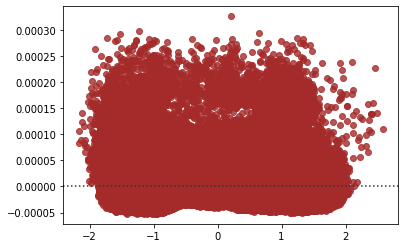

In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence as olsi
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

lrmodel = OLS(y, hmda_no_y)
results = lrmodel.fit()

studentized_residuals = olsi(results).resid_studentized
keep_observ_at_indx = [i for i in studentized_residuals if abs(i) > 3] # applying the above mentioned thumb rule
leverage_pts = olsi(results).hat_matrix_diag        # this will give the array of leverage values
sb.residplot(x = studentized_residuals, y = leverage_pts, color = 'brown')
plt.show()


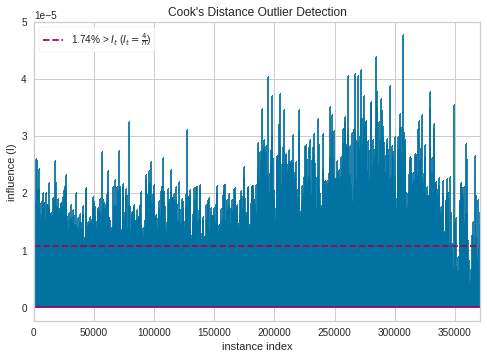

In [ ]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
visualizer = CooksDistance()
visualizer.fit(hmda_no_y, y)
visualizer.show()

la rilevazione di punti influenti non è obbligatoria per le reti neurali, ma solo consigliata, dato che sembrano davvero essere troppi i punti influenti decidiamo di tenerli 

**dati non bilanciati** controlliamo che il dataset sia bilanciato 

In [ ]:
hmda_reg.apply(lambda x: x.value_counts()).T.stack()

action_taken                 0.0         130900.0
                             1.0         240170.0
agency_code                  1.0          25560.0
                             2.0           7832.0
                             3.0          13036.0
                             5.0          42527.0
                             7.0         127232.0
                             9.0         154883.0
applicant_ethnicity          1.0          24043.0
                             2.0         270944.0
                             3.0          39427.0
                             4.0          36656.0
applicant_race_1             1.0           1504.0
                             2.0          26851.0
                             3.0          26980.0
                             4.0           1205.0
                             5.0         235666.0
                             6.0          42409.0
                             7.0          36455.0
applicant_sex                1.0         205417.0


i dati non sembrano essere sbilanciato con circa il 35% di coloro che hanno chiesto il muto che non l'hanno ottenuto ed un 65% invece che l'ha ottenuto. 

In [ ]:
hmda_reg.to_csv('hmda_tree.csv')
!cp hmda_tree.csv "drive/My Drive/stat_spaziale/" #salviamo questo dataset che sarà poi quello che ci servirà per allenare l'albero 

**test e validation**
ora dividiamo il dataset in dati di test e dati di validation

In [ ]:
hmda_reg["income"] = hmda_reg["income"].round(2)
hmda_reg["msamd_income"] = hmda_reg["msamd_income"].round(2)

queste variabili presentano 4 valori decimali che arrotondiamo a 2 

In [ ]:
hmda_reg.to_csv('hmda_reg.csv')
!cp hmda_reg.csv "drive/My Drive/stat_spaziale/"
hmda_reg = pd.read_csv(filepath + "hmda_reg.csv")

In [ ]:
hmda_reg= hmda_reg.reset_index()

In [ ]:
hmda_reg =hmda_reg[~hmda_reg.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(hmda_reg, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 296856
No. of testing examples: 74214


In [ ]:
training_data.to_csv('training_data.csv')
!cp training_data.csv "drive/My Drive/stat_spaziale/"
y_test_nn = testing_data["action_taken"]
testing_data.drop(['action_taken'], axis = 1, inplace = True)
testing_data.to_csv('testing_data.csv')
!cp testing_data.csv "drive/My Drive/stat_spaziale/"

In [ ]:
testing_data = pd.read_csv(filepath + "testing_data.csv")
training_data = pd.read_csv(filepath + "training_data.csv")

In [ ]:
testing_data.columns 
testing_data.drop(['Unnamed: 0'], axis = 1, inplace = True) #eliminiamo la solita colonna 

In [ ]:
y_train_nn = training_data["action_taken"]
X_train_nn = pd.DataFrame(training_data, columns = ['agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code',  'lien_status', 'loan_purpose',
       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 
       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
       'minority_pop', 'num_of_1_to_4_family_units',
       'num_of_owner_occupied_units', 'population_tot', 'msamd_income'
])

In [ ]:
hmda_inf = hmda_reg.isin([np.inf, -np.inf])

In [ ]:
X_train_nn.shape

(296856, 24)

In [ ]:
testing_data.shape

(74214, 26)

In [ ]:
testing_data.drop(['Unnamed: 0.1', "index"], axis = 1, inplace = True)

eliminiamo le variabili che non ci servono nei dati di test 

In [ ]:
#from sklearn.neural_network import MLPClassifier

#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
#mlp.fit(X_train_nn,y_train_nn)

#predict_train_nn = mlp.predict(X_train_nn)
#predict_test_nn = mlp.predict(testing_data)

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_train_nn,predict_train_nn))
#print(classification_report(y_train_nn,predict_train_nn))

In [ ]:
#import json
#report_train_nn = classification_report(y_train_nn, predict_train_nn, output_dict = True)
#def save_json(obj, path):
#    with open(path, 'w') as jf:
#        json.dump(obj, jf)
#save_json(report_train_nn, '/content/drive/MyDrive/stat_spaziale/report_train_nn.csv')

#confusion_matrix_train_nn = pd.DataFrame(report_train_nn)
#confusion_matrix_train_nn.to_csv("confusion_matrix_train_nn.csv")
#!cp confusion_matrix_train_nn.csv "drive/My Drive/stat_spaziale/"

dopo aver allenato la rete neurale stampiamo a video la matrice di confusione sui dati di training

In [ ]:
confusion_matrix_train_nn = pd.read_csv(filepath + 'confusion_matrix_train_nn.csv')

In [ ]:
confusion_matrix_train_nn.head()

Unnamed: 0            0.0            1.0  accuracy      macro avg  \
0  precision       0.646185       0.997675  0.806637       0.821930   
1     recall       0.996988       0.703115  0.806637       0.850051   
2   f1-score       0.784139       0.824888  0.806637       0.804513   
3    support  104573.000000  192283.000000  0.806637  296856.000000   

    weighted avg  
0       0.873856  
1       0.806637  
2       0.810533  
3  296856.000000

abbiamo un'accuracy generale di 0.78, quindi buona; significa che l'80% delle osservazioni sono state correttamente classificate. la precision di 0.86 ci dice che di tutti coloro che sono hann davvero ottenuto il mutuo, noi abbiamo classificato correttamente l'86% di questo, mentre una recall di 0.78 ci dice che di tutti coloro che sono stati classificati come 1(ottenere il mutuo) il 78% l'ha davvero ottenuto. lf'1 score che è una media armonica tra la precision e la recall è pari a 0.79, indicando che il nostro modello ha generalmente delle buone perfomance sui dati di training. 

e ora stampiamo la matrice di confusione sui dati di test

In [ ]:
#print(confusion_matrix(y_test_nn,predict_test_nn))
#print(classification_report(y_test_nn,predict_test_nn))

In [ ]:
#import json
#report_test_nn = classification_report(y_test_nn,predict_test_nn, output_dict = True)
#def save_json(obj, path):
#    with open(path, 'w') as jf:
#        json.dump(obj, jf)
#save_json(report_test_nn, '/content/drive/MyDrive/stat_spaziale/report_test_nn.csv')

#confusion_matrix_test_nn = pd.DataFrame(report_test_nn)
#confusion_matrix_test_nn.to_csv("confusion_matrix_test_nn.csv")
#!cp confusion_matrix_test_nn.csv "drive/My Drive/stat_spaziale/"

In [ ]:
confusion_matrix_test_nn = pd.read_csv(filepath + 'confusion_matrix_test_nn.csv')

In [ ]:
confusion_matrix_test_nn.head()

Unnamed: 0           0.0           1.0  accuracy     macro avg  weighted avg
0  precision      0.648572      0.997364  0.807233      0.822968      0.873632
1     recall      0.996619      0.703114  0.807233      0.849867      0.807233
2   f1-score      0.785781      0.824780  0.807233      0.805280      0.810945
3    support  26327.000000  47887.000000  0.807233  74214.000000  74214.000000

in generale delle possibili accortezze che possiamo prendere per migliorare il modello; droppare le variabili con near zero variance ad una soglia maggiore, droppare i dati influenti e provare a bilanciare il dataset(anche se di per sè non è molto sbilanciato) 

nei dati di test le metriche sono praicamente invariante, sempre con una recall di 0.78, una precision di 0.86 e un f1 score di 0.79. 

ora che abbiamo ottenuto il modello black box quello che vogliamo fare è verificare se questo modello è in qualche modo biased e per farlo costruiamo sia un albero che un modello sharp per verificare il bias, in particolare ci concentriamo sulle variabili sesso ed etnia. 

modello 

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 37.2 MB/s 


In [ ]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [ ]:
model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(5,),activation='logistic', max_iter=10000,learning_rate='invscaling',random_state=0)
)

In [ ]:
model.fit(X_train_nn,y_train_nn)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', hidden_layer_sizes=(5,),
                              learning_rate='invscaling', max_iter=10000,
                              random_state=0))])

abbiamo costruito il modello che ci servirà dopo con shap 

#XAI: albero 
quello che faremo è allenare un albero sugli stessi dati e poi vedere se le variabili che ci interessano sono molto più importanti di altre. 

In [ ]:
#from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#from sklearn.model_selection import train_test_split # Import train_test_split function
#from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

dato che gli alberi non hanno bisogo di preprocessing usiamo il datset prima del preprocssing 

In [ ]:
hmda_tree = pd.read_csv(filepath + "hmda_tree.csv")

In [ ]:
hmda_tree.head()

Unnamed: 0  action_taken  agency_code  applicant_ethnicity  \
0           0             1          9.0                  2.0   
1           1             1          9.0                  2.0   
2           2             1          7.0                  2.0   
3           3             1          9.0                  2.0   
4           4             1          9.0                  2.0   

   applicant_race_1  applicant_sex  application_date_indicator  \
0               5.0            2.0                         0.0   
1               5.0            1.0                         0.0   
2               3.0            1.0                         0.0   
3               5.0            1.0                         0.0   
4               5.0            1.0                         0.0   

   co_applicant_ethnicity  co_applicant_race_1  co_applicant_sex  ...  \
0                     5.0                  8.0               5.0  ...   
1                     5.0                  8.0               5.0  ...   
2                     5.0                  8.0               5.0  ...   
3                     2.0                  5.0               2.0  ...   
4                     5.0                  8.0               5.0  ...   

   preapproval  purchaser_type  hud_median_family_income  income  loan_amount  \
0          3.0             0.0                  109000.0    11.0         12.0   
1          3.0             6.0                   71300.0    12.0         15.0   
2          3.0             3.0                   71300.0     9.0         13.0   
3          3.0             0.0                  109000.0    13.0         18.0   
4          2.0             0.0                  109000.0    13.0         17.0   

   minority_pop  num_of_1_to_4_family_units  num_of_owner_occupied_units  \
0           1.0                         1.0                          2.0   
1           2.0                         1.0                          1.0   
2           2.0                         3.0                          3.0   
3           1.0                         2.0                          3.0   
4           2.0                         1.0                          1.0   

   population_tot  msamd_income  
0             3.0           3.0  
1             2.0           4.0  
2             3.0           3.0  
3             3.0           4.0  
4             2.0           3.0  

[5 rows x 26 columns]

In [ ]:
hmda_tree.columns

Index(['Unnamed: 0', 'action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'lien_status', 'loan_purpose', 'loan_type', 'msamd',
       'owner_occupancy', 'preapproval', 'purchaser_type',
       'hud_median_family_income', 'income', 'loan_amount', 'minority_pop',
       'num_of_1_to_4_family_units', 'num_of_owner_occupied_units',
       'population_tot', 'msamd_income'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', None)
percent_missing = hmda_tree.isnull().sum() * 100 / len(hmda_tree)
percent_missing

Unnamed: 0                     0.0
action_taken                   0.0
agency_code                    0.0
applicant_ethnicity            0.0
applicant_race_1               0.0
applicant_sex                  0.0
application_date_indicator     0.0
co_applicant_ethnicity         0.0
co_applicant_race_1            0.0
co_applicant_sex               0.0
county_code                    0.0
lien_status                    0.0
loan_purpose                   0.0
loan_type                      0.0
msamd                          0.0
owner_occupancy                0.0
preapproval                    0.0
purchaser_type                 0.0
hud_median_family_income       0.0
income                         0.0
loan_amount                    0.0
minority_pop                   0.0
num_of_1_to_4_family_units     0.0
num_of_owner_occupied_units    0.0
population_tot                 0.0
msamd_income                   0.0
dtype: float64

anche se i dati mancanti non sono un problema per l'albero dato che la variabile "co_applicant_race_4" presenta il 99% dei dati mancanti la eliminiamo ed eliminiamo anche la variabile "Unnamed: 0" 

In [ ]:
hmda_tree.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
hmda_tree.columns #controllo 

Index(['action_taken', 'agency_code', 'applicant_ethnicity',
       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
       'county_code', 'lien_status', 'loan_purpose', 'loan_type', 'msamd',
       'owner_occupancy', 'preapproval', 'purchaser_type',
       'hud_median_family_income', 'income', 'loan_amount', 'minority_pop',
       'num_of_1_to_4_family_units', 'num_of_owner_occupied_units',
       'population_tot', 'msamd_income'],
      dtype='object')

ora individuiamo la variabile target 

In [ ]:
#feature_cols = [ 'agency_code', 'applicant_ethnicity',
#       'applicant_race_1', 'applicant_sex', 'application_date_indicator',
#       'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_sex',
#       'county_code',  'lien_status', 'loan_purpose',
#       'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 
#       'purchaser_type', 'hud_median_family_income', 'income', 'loan_amount',
#       'minority_pop', 'num_of_1_to_4_family_units',
#      'num_of_owner_occupied_units', 'population_tot', 'msamd_income']
#X_tree = hmda_tree[feature_cols] # Features
#y_tree = hmda_tree.action_taken # Target variable

dividiamo il dataset in dati di training e di validation 

In [ ]:
#X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=1) # 80% training and 20% test

In [ ]:
#type(y_train_tree)
#type(y_test_tree)

salviamo i dataset e le variabili target in file esterni 

In [ ]:
#y_train_tree.to_csv("y_train_tree.csv", index = False)
#!cp y_train_tree.csv "drive/My Drive/stat_spaziale/"
#y_test_tree.to_csv('y_test_tree.csv', index = False)
#!cp y_test_tree.csv "drive/My Drive/stat_spaziale/"

In [ ]:
y_train_tree = pd.read_csv(filepath + 'y_train_tree.csv', index_col=False, header=None)
y_test_tree = pd.read_csv(filepath + 'y_test_tree.csv', index_col=False, header=None)

In [ ]:
type(y_train_tree)

pandas.core.frame.DataFrame

ora convertiamo i target in oggetti "serie" di pandas

In [ ]:
y_train_tree.squeeze()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_test_tree.squeeze()

0        action_taken
1                 1.0
2                 1.0
3                 1.0
4                 0.0
5                 0.0
6                 1.0
7                 0.0
8                 1.0
9                 0.0
10                0.0
11                1.0
12                0.0
13                0.0
14                1.0
15                1.0
16                1.0
17                0.0
18                1.0
19                0.0
20                0.0
21                1.0
22                1.0
23                0.0
24                1.0
25                0.0
26                1.0
27                0.0
28                1.0
29                0.0
30                1.0
31                1.0
32                0.0
33                1.0
34                1.0
35                1.0
36                1.0
37                1.0
38                1.0
39                1.0
40                0.0
41                1.0
42                0.0
43                1.0
44                1.0
45        

In [ ]:
#X_train_tree.to_csv('X_train_tree.csv')
#!cp X_train_tree.csv "drive/My Drive/stat_spaziale/"
#X_test_tree.to_csv('X_test_tree.csv')
#!cp X_test_tree.csv "drive/My Drive/stat_spaziale/"

In [ ]:
X_train_tree = pd.read_csv(filepath + "X_train_tree.csv")
X_test_tree = pd.read_csv(filepath + "X_test_tree.csv")

In [ ]:
X_train_tree.head()

Unnamed: 0  agency_code  applicant_ethnicity  applicant_race_1  \
0      359674          9.0                  4.0               7.0   
1      272080          9.0                  2.0               5.0   
2      358242          9.0                  2.0               5.0   
3      368304          7.0                  4.0               7.0   
4       97739          9.0                  2.0               5.0   

   applicant_sex  application_date_indicator  co_applicant_ethnicity  \
0            4.0                         2.0                     4.0   
1            1.0                         0.0                     2.0   
2            1.0                         2.0                     5.0   
3            4.0                         2.0                     5.0   
4            2.0                         0.0                     2.0   

   co_applicant_race_1  co_applicant_sex  county_code  ...  preapproval  \
0                  7.0               4.0          5.0  ...          3.0   
1                  5.0               2.0        117.0  ...          2.0   
2                  8.0               5.0         29.0  ...          3.0   
3                  8.0               5.0         45.0  ...          3.0   
4                  5.0               1.0         81.0  ...          3.0   

   purchaser_type  hud_median_family_income  income  loan_amount  \
0             7.0                   71300.0     8.0          2.0   
1             0.0                   69700.0     5.0          7.0   
2             3.0                   69000.0     7.0         12.0   
3             2.0                   57200.0     6.0          9.0   
4             1.0                   71300.0    12.0         11.0   

   minority_pop  num_of_1_to_4_family_units  num_of_owner_occupied_units  \
0           4.0                         1.0                          4.0   
1           1.0                         2.0                          1.0   
2           1.0                         2.0                          1.0   
3           1.0                         3.0                          1.0   
4           2.0                         1.0                          1.0   

   population_tot  msamd_income  
0             4.0           2.0  
1             2.0           2.0  
2             2.0           3.0  
3             2.0           3.0  
4             2.0           3.0  

[5 rows x 25 columns]

In [ ]:
X_train_tree.isnull().values.any()

False

In [ ]:
X_train_tree.drop(["Unnamed: 0"], axis = 1, inplace = True)
X_test_tree.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
#y_train_tree.head()
y_train_tree.shape

(296857, 1)

In [ ]:
type(y_train_tree)

pandas.core.frame.DataFrame

In [ ]:
y_train_tree.head()

0
0  action_taken
1           1.0
2           0.0
3           1.0
4           1.0

In [ ]:
y_train_tree = y_train_tree.iloc[1: , :]


In [ ]:
y_test_tree = y_test_tree.iloc[1: , :]

eliminiamo la prima riga che corrisponde al nome della colonna 

In [ ]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train_tree,y_train_tree)

#Predict the response for test dataset
#y_pred_tree = clf.predict(X_test_tree)

in teoria l'albero è capace di gestire i valoti mancanti e in generale non ha bisogno di alcun preprocessing ma scikitlearn mi dà comunque problemi, quindi procdo ad utilizzare il datatset preproecessato usato nel caso delle NN

visualizziamo l'albero

In [ ]:
#import numpy as np
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pylab as plt
#from sklearn import datasets, ensemble, model_selection
#from sklearn.ensemble import RandomForestClassifier
#fig = plt.figure(figsize=(16, 8))
#vis = tree.plot_tree(clf, feature_names = feature_cols, class_names = ['0', '1'], max_depth=5, fontsize=9, proportion=True, filled=True, rounded=True)

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['compress']
`%matplotlib` prevents importing * from pylab and numpy


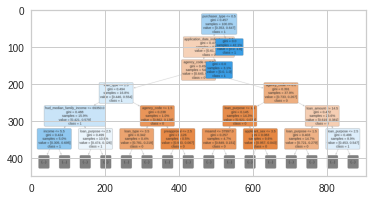

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/stat_spaziale/albero.png')
imgplot = plt.imshow(img)
plt.show()

la variabile più importante sembra essere purchaser_type, come previsto dalla model selection, "purchaser_type" indica al secondo ed al terzo posto per importanza ci sono application_date_indicator e agency_code. poi troviamo loan type, loan amount e hud_median_family_income

mettere la matrice di confusione sul train dell'albero 

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test_tree, y_pred_tree))
#print(classification_report(y_test_tree, y_pred_tree))


In [ ]:
#import json
#report = classification_report(y_test_tree, y_pred_tree, output_dict = True)
#def save_json(obj, path):
#    with open(path, 'w') as jf:
#        json.dump(obj, jf)
#save_json(report, '/content/drive/MyDrive/stat_spaziale/report.csv')

#confusion_matrix_tree = pd.DataFrame(report)
#confusion_matrix_tree.to_csv("confusion_matrix_tree.csv")
#!cp confusion_matrix_tree.csv "drive/My Drive/stat_spaziale/"

abbiamo salvato la matrice di confusione sui dati di test dell'albero in un dataset esterno in modo da non dover rifar andare il codice ogni volta 

In [ ]:
confusion_matrix_tree= pd.read_csv(filepath + "confusion_matrix_tree.csv")

In [ ]:
confusion_matrix_tree.head()

Unnamed: 0           0.0           1.0  accuracy     macro avg  weighted avg
0  precision      0.742681      0.864839  0.821206      0.803760      0.821820
1     recall      0.753281      0.858129  0.821206      0.805705      0.821206
2   f1-score      0.747944      0.861471  0.821206      0.804707      0.821492
3    support  26135.000000  48079.000000  0.821206  74214.000000  74214.000000

l'albero ha delle performance leggermente superiori a quelle dell'albero, ma molto simili; con una f-1 score di 0.82, pari anche alla precision e alla recall


#XAI: SHAP

In [ ]:
#import shap
#import numpy as np 
#import pandas as pd 
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras import optimizers
#import warnings 
#warnings.filterwarnings('ignore')
#%matplotlib inline
#import os

In [ ]:
#sample = shap.sample(X_train_nn, 10)
#explainer = shap.KernelExplainer(model.predict,sample)

In [ ]:
#shap_values = explainer.shap_values(testing_data,nsamples=100)

In [ ]:
#shap.summary_plot(shap_values,testing_data,feature_names=feature_cols, show = False)

In [ ]:
#plt.savefig('shap_values.png')

Populating the interactive namespace from numpy and matplotlib


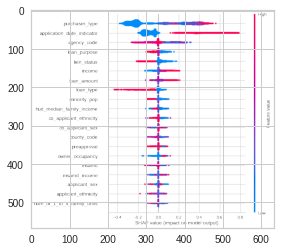

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/stat_spaziale/shap_values.png')
imgplot = plt.imshow(img)
plt.show()


le variabili più importanti individuate da shap sono le stesse individuate dall'albero, ossia "purchaser_type" , "application_date_indicator", "agency_code" e "loan_purpose". 
dalle analisi il fatto di concedere o meno un mutuo non viene influenzato dal sesso nè dall'etnia. 

fidelity di shap 

In [ ]:
pip install leaf.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 104 kB 49.9 MB/s 


In [ ]:
import importlib
import sklearn
import sklearn.datasets
import sklearn.ensemble
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
import numpy as np
import numpy.linalg as linalg
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, importlib, copy, re, math, warnings, itertools, time, datetime
from imblearn.over_sampling import SMOTE
import scipy.stats
from termcolor import colored
import shap

import leaf

ModuleNotFoundError: ignored

In [ ]:
hr_X = X_test_tree
hr_Y = y_test_tree
hr_class_names=['SI', 'No']
importlib.reload(leaf)
hr_ds = (hr_X, hr_Y, hr_class_names, "mutuo")
hr_cls = leaf.train_model(hr_X, hr_Y, model, verbose=False)

In [ ]:
print('SHAP stability:        ', l.get_shap_stability())
print('SHAP local_concordance:', l.get_shap_local_concordance())
print('SHAP fidelity:         ', l.get_shap_fidelity())
print('SHAP prescriptivity:   ', l.get_shap_prescriptivity())